## Business Problem 

How can public health organizations effectively increase the uptake of H1N1 and Seasonal flu vaccines by identifying key influencing factors and targeting the right populations with tailored interventions?


## Business Understanding

From the H1N1 and Seasonal flu vaccine dataset, the following business questions and insights can be addressed:

1. What are the key factors influencing vaccination uptake for H1N1 and Seasonal flu?

2. What is the distribution of vaccine uptake in the population?

3. How do behaviours and opinions influence vaccine adoption?

4. Can we predict the likelihood of individuals receiving the H1N1 and Seasonal flu vaccine? If so, what are the most important factors?



## Data Understanding   

The dataset contains 261,407 observations, with 38 features. The target variables are h1n1_vaccine and seasonal_vaccine. The dataset includes various features related to respondents' behaviours, demographics, and knowledge about H1N1 and seasonal flu.




### Loading Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (roc_auc_score, classification_report)
from sklearn.ensemble import RandomForestClassifier


In [5]:
# Load the dataset
data = pd.read_csv('Data/H1N1_Flu_Vaccines.csv')
# display the first 5 rows 
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
data.shape

(26707, 38)

The dataset contains 38 columns, including features related to respondents' behaviours, demographics, and knowledge about H1N1 and seasonal flu, along with two target variables 

1. **h1n1_vaccine**: Whether the respondent received the H1N1 vaccine (0 = No, 1 = Yes).
2. **seasonal_vaccine**: Whether the respondent received the seasonal flu vaccine (0 = No, 1 = Yes).


### Checking for missing values 

In [7]:
# create a copy of the dataset

data = data.copy()

In [8]:
# checking for missing data
def checking_missing_data(dataframe):
    missing_data = dataframe.isnull().sum().sort_values(ascending=False)
    missing_percentage = (missing_data/len(dataframe)) * 100
    
    missing_summary = pd.DataFrame({
        'Missing Values': missing_data,
        'Percentage': missing_percentage
    })
    
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
    
    return missing_summary

missing_summary = checking_missing_data(data)
print("Missing Data Summary:")
print(missing_summary)

Missing Data Summary:
                             Missing Values  Percentage
employment_occupation                 13470   50.436215
employment_industry                   13330   49.912008
health_insurance                      12274   45.957989
income_poverty                         4423   16.561201
doctor_recc_h1n1                       2160    8.087767
doctor_recc_seasonal                   2160    8.087767
rent_or_own                            2042    7.645936
employment_status                      1463    5.477965
marital_status                         1408    5.272026
education                              1407    5.268282
chronic_med_condition                   971    3.635751
child_under_6_months                    820    3.070356
health_worker                           804    3.010447
opinion_seas_sick_from_vacc             537    2.010709
opinion_seas_risk                       514    1.924589
opinion_seas_vacc_effective             462    1.729884
opinion_h1n1_sick_from_vac

*Summary of missing Values*

Significant missing data is found in 

1. **employment_occupation**: 50.4% missing data
2. **employment_industry**: 49.9% missing data
3. **health_insurance**: 46.0% missing data
4. **income_poverty**: 16.6% missing data

### Distribution of the target variables

In [9]:
# Analyze the distribution of the target variable 
target_distribution = data[['h1n1_vaccine', 'seasonal_vaccine']].mean()

# display the percentage of respondents who received each vaccine 
target_distribution * 100

h1n1_vaccine        21.245366
seasonal_vaccine    46.560827
dtype: float64

- ***H1N1 Vaccine***: About 21.25% of the respondents received the H1N1 vaccine
- ***Seasonal Flu Vaccine***: About 46.56% of respondents received the seasonal flu vaccine

This indicates an imbalance in the target variables, particularly for the H1N1 vaccine. 



h1n1_vaccine Class Distribution:
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Proportions:
0    78.754634
1    21.245366
Name: h1n1_vaccine, dtype: float64


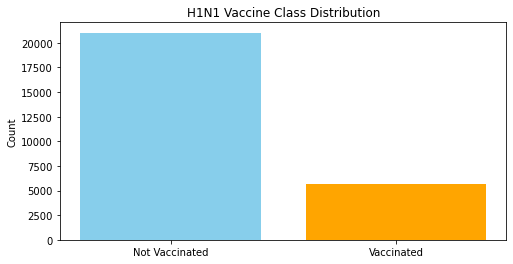

seasonal_vaccine Class Distribution:
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Proportions:
0    53.439173
1    46.560827
Name: seasonal_vaccine, dtype: float64


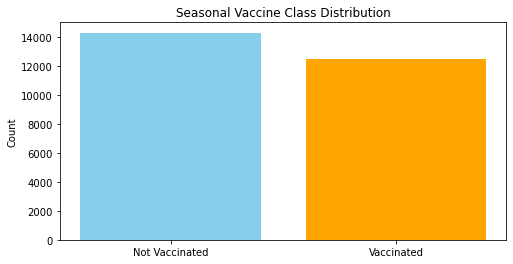

In [10]:
# Function to check class distribution
def check_distribution(data, column):
    counts = data[column].value_counts()
    proportions = data[column].value_counts(normalize=True)
    perc_proportions = proportions * 100
    print(f"{column} Class Distribution:")
    print(counts)
    print("\nProportions:")
    print(perc_proportions)
    return counts

# Function to plot bar graphs
def plot_distribution(counts, title, labels):
    plt.figure(figsize=(8, 4))
    plt.bar(counts.index, counts.values, color=['skyblue', 'orange'])
    plt.title(title)
    plt.xticks(counts.index, labels)
    plt.ylabel('Count')
    plt.show()

h1n1_counts = check_distribution(data, 'h1n1_vaccine')
plot_distribution(h1n1_counts, 'H1N1 Vaccine Class Distribution', ['Not Vaccinated', 'Vaccinated'])

seasonal_counts = check_distribution(data, 'seasonal_vaccine')
plot_distribution(seasonal_counts, 'Seasonal Vaccine Class Distribution', ['Not Vaccinated', 'Vaccinated'])


### Insights
- H1N1 vaccine

The dataset is highly imbalanced for h1n1_vaccine target variable, with significantly more individuals not receiving the vaccine (almost 79%) compared to who did (about 21%).

- Seasonal flu vaccine

The seasonal_vaccine variable shows a more balanced distribution, with a slight majority of individuals not receiving the vaccine (53.44%) compared to those who did (46.56%).

Evaluating model perfomance with metrics like AUC-ROC, F1=score, or Precision-Recall Curve, are more appropriate for this imbalanced datasets.


### Exploratory Data Analysis (EDA)

#### Overview of vaccine uptake for H1N1 and Seasonal Flu

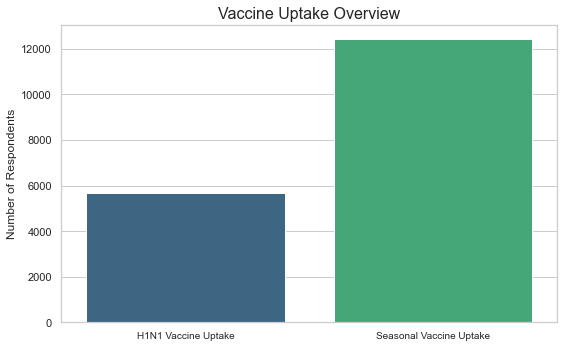

In [11]:
# Overview of vaccine uptake for H1N1 and Seasonal Flu
vaccine_counts = data[["h1n1_vaccine", "seasonal_vaccine"]].sum()
vaccine_counts.index = ["H1N1 Vaccine Uptake", "Seasonal Vaccine Uptake"]

# Plot vaccine uptake
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.figure(figsize=(8, 5))
sns.barplot(x=vaccine_counts.index, y=vaccine_counts.values, palette="viridis")
plt.title("Vaccine Uptake Overview", fontsize=16)
plt.ylabel("Number of Respondents", fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

**Insights**
- H1N1 Vaccine Uptake: Less uptake compared to the seasonal flu vaccine.
- Seasonal Flu Vaccine Uptake: Higher in comparison to H1N1 Vaccine Uptake.

#### Vaccine Uptake by Demographics (Age)

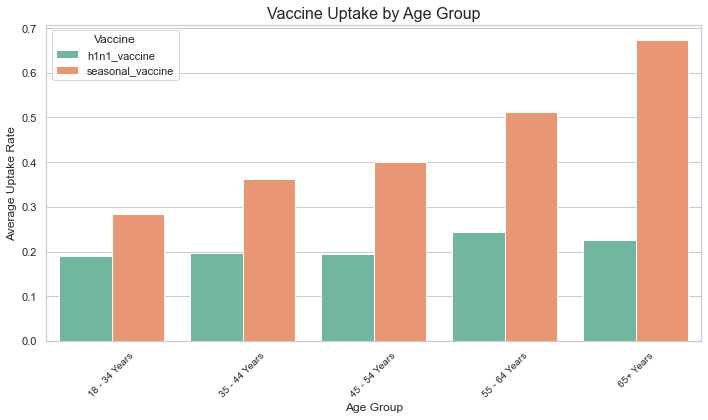

In [12]:
# Plot H1N1 vaccine and Seasonal flu vaccine uptake by age group
age_vaccine = data.groupby("age_group")[["h1n1_vaccine", "seasonal_vaccine"]].mean().reset_index()
age_vaccine_melted = age_vaccine.melt(id_vars="age_group", var_name="Vaccine", value_name="Uptake Rate")

plt.figure(figsize=(10, 6))
sns.barplot(x="age_group", y="Uptake Rate", hue="Vaccine", data=age_vaccine_melted, palette="Set2")
plt.title("Vaccine Uptake by Age Group", fontsize=16)
plt.ylabel("Average Uptake Rate", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

**Insights**

Older age groups show higher uptake for both vacccines, which aligns with risk perception and public health priorities.

## Modelling

**Why use a machine learning model?**

- Challenge: Vaccine uptake is influenced by multiple factors (e.g., demographics, behavior, access to healthcare), and their relationships can be non-linear and complex.

- ML Solution: ML models like Random Forests and Logistic Regression identify the most important features influencing uptake, such as physician recommendations, education, or insurance status.
This helps focus on actionable factors to improve vaccination rates.

In [13]:
# Drop high-missing-value features
drop_features = ['employment_industry', 'employment_occupation', 'health_insurance', 'income_poverty']
data = data.drop(columns=drop_features)

- Dropping features with excessive missing values reduces the risk of introducing noice.

In [14]:
# Separate the features and the target variables
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = data['h1n1_vaccine']
y_seasonal = data['seasonal_vaccine']

# split the data into training and test data
X_train, X_test, y_h1n1_train, y_h1n1_test, y_seasonal_train, y_seasonal_test = train_test_split(
    X, y_h1n1, y_seasonal, test_size=0.2, random_state=42
)

***X variables*** - Independent variables used as inputs for the model to make predictions.

***y variables*** - Dependent variables the model aims to predict. The model aims to predict whether a respondent received the h1n1 vaccine or the seasonal vaccine

In [15]:
# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:
categorical_features

Index(['age_group', 'education', 'race', 'sex', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa'],
      dtype='object')

Separating numerical and categorical features is important as different data types often require different treatements during machine learning.

### Preprocessing Training Data

In [17]:
# Handle missing values
num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train[numerical_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])

Numerical and categorical data represent different information, requiring tailored imputation strategies.

- Median - Median works well for numerical data to avoid distortion by outliers.

- Mode - Mode works for categorical data to maintain category consistency.

In [18]:
# Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)

Scaling data ensures numerical features have the same scale, preventing features with large ranges from dominating the model.

Standardizes the numerical features so they have a mean of 0 and a standard deviation of 1.

In [19]:
# Encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)

In [20]:
X_train[categorical_features]

,age_group,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
24706,45 - 54 Years,Some College,White,Female,Married,Rent,Unemployed,lzgpxyit,"MSA, Not Principle City"
5393,45 - 54 Years,College Graduate,White,Male,Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City"
20898,35 - 44 Years,NaN,White,Male,Married,NaN,Employed,qufhixun,"MSA, Not Principle City"
3429,45 - 54 Years,College Graduate,Other or Multiple,Female,Not Married,Own,Employed,bhuqouqj,Non-MSA
8731,65+ Years,College Graduate,Black,Female,Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City"
...,...,...,...,...,...,...,...,...,...
21575,55 - 64 Years,Some College,White,Male,Not Married,Own,Not in Labor Force,qufhixun,"MSA, Principle City"
5390,55 - 64 Years,Some College,White,Male,Not Married,Own,Unemployed,mlyzmhmf,"MSA, Principle City"
860,55 - 64 Years,12 Years,White,Female,Married,Own,Employed,qufhixun,Non-MSA
15795,35 - 44 Years,College Graduate,Black,Female,Married,Own,Employed,kbazzjca,"MSA, Principle City"


Converts categorical features into a numerical format which is necessary when working models such as Logistic Regression.

In [21]:
# Combine preprocessed numerical and categorical features
X_train_preprocessed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_train_preprocessed.shape

(21365, 58)

### Preprocessing Testing Data

In [22]:
# Apply the same transformations to the test set
X_test_num = num_imputer.transform(X_test[numerical_features])
X_test_cat = cat_imputer.transform(X_test[categorical_features])

X_test_num_scaled = scaler.transform(X_test_num)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_test_preprocessed = np.hstack((X_test_num_scaled, X_test_cat_encoded))
# X_test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

### Logistic Regression

Logistic Regression is a probabilistic model that predicts the probability of a binary outcome based on the input features.

**Logistic Regression** is suitable for this analysis because both the H1N1 vaccine and seasonal flu vaccine columns are binary. 



In [23]:
# Train a Logistic Regression model for H1N1 vaccine
model_h1n1 = LogisticRegression(max_iter=500, random_state=42)
model_h1n1.fit(X_train_preprocessed, y_h1n1_train)

# Predict probabilities
y_h1n1_pred = model_h1n1.predict_proba(X_test_preprocessed)[:, 1]
h1n1_auc = roc_auc_score(y_h1n1_test, y_h1n1_pred)

print(f"H1N1 Vaccine ROC AUC: {h1n1_auc:.4f}")

# Predict class labels for classsification report
y_pred_h1n1_labels = model_h1n1.predict(X_test_preprocessed)
print("Classification Report:\n", classification_report(y_h1n1_test, y_pred_h1n1_labels))



H1N1 Vaccine ROC AUC: 0.8268
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.42      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.82      5342



The ROC-AUC score indicates that the model is able to distinguish whether a patient is vaccinated or not vaccinated 82.68% of the time with the H1N1 vaccine. This suggests that the model has good discriminatory power.

Class 0 (Non-vaccinated for H1N1):

- Precision (0.86): Out of all the samples predicted as not vaccinated, 86% are correct.

- Recall (0.95): The model correctly identifies 95% of the actual not vaccinated samples.

- F1-score (0.90): A harmonic mean of precision and recall for not vaccinated, indicating strong performance.

Class 1 (Vaccinated for H1N1):

- Precision (0.70): Out of all the samples predicted as vaccinated, 70% are correct.

- Recall (0.42): The model correctly identifies 42% of the actual vaccinated samples. This is relatively low, suggesting difficulty in identifying true vaccinated cases.

- F1-score (0.53): Indicates mediocre performance for vaccinated, as the recall is low.

In [24]:
# Training a Logistic Regression model for seasonal vaccine
model_seasonal = LogisticRegression(max_iter=500, random_state=42)
model_seasonal.fit(X_train_preprocessed, y_seasonal_train)

# predict probabilities
y_seasonal_pred = model_seasonal.predict_proba(X_test_preprocessed)[:, 1]
seasonal_auc = roc_auc_score(y_seasonal_test, y_seasonal_pred)

print(f"Seasonal Vaccine ROC AUC: {seasonal_auc:.4f}")

# Predict class labels for classsification report
y_pred_snl_labels = model_seasonal.predict(X_test_preprocessed)
print("Classification Report:\n", classification_report(y_seasonal_test, y_pred_snl_labels))



Seasonal Vaccine ROC AUC: 0.8516
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2891
           1       0.77      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



The ROC-AUC score indicates that the model is able to distinguish whether a patient is vaccinated or not vaccinated 85.16% of the time with the seasonal flu vaccine.

Class 0 (Non-vaccinated for seasonal flu):

- Precision (0.79): Out of all the samples predicted as not vaccinated, 79% are correct.

- Recall (0.81): The model correctly identifies 81% of the actual not vaccinated samples.

- F1-score (0.80): A harmonic mean of precision and recall for not vaccinated, indicating strong performance.

Class 1 (Vaccinated for seasonal flu):

- Precision (0.77): Out of all the samples predicted as vaccinated, 77% are correct.

- Recall (0.74): The model correctly identifies 74% of the actual vaccinated samples. This is relatively low, suggesting difficulty in identifying true vaccinated cases.

- F1-score (0.76): Indicates mediocre performance for vaccinated, as the recall is low.

### Pros and cons of using Logistic Regression

**Pros:**

1. Simple and interpretable: Logistic Regression is easy to understand and interpret, making it a good choice for initial analysis.

2. Fast and efficient: Logistic Regression is computationally efficient and can handle large datasets.

3. Works well with both numerical and categorical data: Logistic Regression can handle both numerical and categorical features, making it a flexible and powerful tool for analyzing data.

**Cons:**

1. Assumes linear relationship between features and the target variable: Logistic Regression assumes that the relationship between the features and the target variable is linear. If the relationship is non-linear, the model may not perform well.

2. Assumes independence of features: Logistic Regression assumes that the features are independent of each other. If there are correlations between features, the model may not perform well.



### Random Forest Classifier

A Random Forest Classifier is a supervised machine learning algorithm used for classification tasks. It is based on an ensemble learning technique, where multiple decision trees are trained on subsets of the data, and their predictions are aggregated (usually by majority vote) to make a final prediction.

#### Untuned Random Forest Classifier

In [25]:
# Random Forest Classifier without tuning for H1N1
rf_h1n1 = RandomForestClassifier(random_state=42)
rf_h1n1.fit(X_train_preprocessed, y_h1n1_train)
h1n1_rf_probs = rf_h1n1.predict_proba(X_test_preprocessed)[:, 1]
h1n1_rf_auc = roc_auc_score(y_h1n1_test, h1n1_rf_probs)
print("H1n1 Random Forest AUC(untuned): ", h1n1_rf_auc)
# print("Classification Report:\n", classification_report(h1n1_rf_auc))

H1n1 Random Forest AUC(untuned):  0.8246229693501079


An AUC score of 0.8246 means the model has a strong ability to distinguish between the two classes that is vaccinated vs. not vaccinated for H1N1.

Despite being untuned, the Random Forest model performs well and achieves a similar AUC to the logistic regression model (AUC = 0.8268). This suggests the dataset provides enough useful features for classification.

In [26]:
# Random Forest Classifier without tuning for Seasonal
rf_seasonal = RandomForestClassifier(random_state=42)
rf_seasonal.fit(X_train_preprocessed, y_seasonal_train)
seasonal_rf_probs = rf_seasonal.predict_proba(X_test_preprocessed)[:, 1]
seasonal_rf_auc = roc_auc_score(y_seasonal_test, seasonal_rf_probs)
print("Seasonal Random Forest AUC(untuned): ", seasonal_rf_auc)
# print("Classification Report:\n", classification_report(seasonal_rf_auc))

Seasonal Random Forest AUC(untuned):  0.84894291305718


An AUC score of 0.8489 means the model has a strong ability to distinguish between the two classes that is vaccinated vs. not vaccinated for Seasonal flu.

The h1n1 untuned Random Forest's AUC (0.8249) is slightly lower than Logistic Regression's AUC (0.8268), but the difference is minimal. This indicates that both models are capturing the data patterns effectively.

#### Tuned Random Forest Classifier

### Hyperparameter Tuning


Hyperparameter tuning is the process of selecting the best set of hyperparameters for a machine learning model to optimize its performance on a given dataset.

In [27]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [28]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# GridSearchCV for H1N1 Vaccine Prediction
grid_search_h1n1 = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the GridSearch for H1N1
grid_search_h1n1.fit(X_train_preprocessed, y_h1n1_train)

# Best Hyperparameters and Score for H1N1
best_h1n1_params = grid_search_h1n1.best_params_
best_h1n1_score = grid_search_h1n1.best_score_
print(f"Best Hyperparameters for H1N1: {best_h1n1_params}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.2min finished


Best Hyperparameters for H1N1: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


Finds the best hyperparameters for tuning the random forest classifier model.

In [29]:
# GridSearchCV for Seasonal Vaccine Prediction
grid_search_seasonal = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the GridSearch for Seasonal Vaccine
grid_search_seasonal.fit(X_train_preprocessed, y_seasonal_train)

# Best Hyperparameters and Score for Seasonal
best_seasonal_params = grid_search_seasonal.best_params_
best_seasonal_score = grid_search_seasonal.best_score_
print(f"Best Hyperparameters for Seasonal: {best_seasonal_params}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.5min finished


Best Hyperparameters for Seasonal: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [30]:
# Get the best models
best_rf_h1n1 = grid_search_h1n1.best_estimator_
best_rf_seasonal = grid_search_seasonal.best_estimator_

# Predict probabilities
h1n1_probs = best_rf_h1n1.predict_proba(X_test_preprocessed)[:, 1]
seasonal_probs = best_rf_seasonal.predict_proba(X_test_preprocessed)[:, 1]

# Predict classes for H1N1 and seasonal Vaccine
h1n1_predictions = best_rf_h1n1.predict(X_test_preprocessed)
seasonal_predictions = best_rf_seasonal.predict(X_test_preprocessed)

# Calculate AUC scores
h1n1_auc = roc_auc_score(y_h1n1_test, h1n1_probs)
seasonal_auc = roc_auc_score(y_seasonal_test, seasonal_probs)

print(f"Optimized H1N1 Vaccine rf AUC Score: {h1n1_auc}")
print(f"Optimized Seasonal Vaccine rf AUC Score: {seasonal_auc}")

# Classification Reports
print("\nClassification Report for Optimized H1N1 Vaccine Model:")
print(classification_report(y_h1n1_test, h1n1_predictions))

print("\nClassification Report for Optimized Seasonal Vaccine Model:")
print(classification_report(y_seasonal_test, seasonal_predictions))

Optimized H1N1 Vaccine rf AUC Score: 0.8317964265604383
Optimized Seasonal Vaccine rf AUC Score: 0.8524835654652708

Classification Report for Optimized H1N1 Vaccine Model:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      4212
           1       0.74      0.35      0.47      1130

    accuracy                           0.84      5342
   macro avg       0.79      0.66      0.69      5342
weighted avg       0.82      0.84      0.81      5342


Classification Report for Optimized Seasonal Vaccine Model:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2891
           1       0.77      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



- H1N1 Vaccine 
***Improvment***
The optimized model achieved an AUC score of 0.8318, which is an improvement over:
  - The untuned Random forest AUC of 0.8246.
  - The Logistic Regression AUC score of 0.8268

Precision: 0.85 for class 0 (no vaccine), 0.74 for class 1 (vaccine)

Recall: 0.97 for class 0, 0.35 for class 1

F1-score: 0.90 for class 0, 0.47 for class 1

Accuracy: 0.79

Precision: 0.79 for class 0 (no vaccine), 0.77 for class 1 (vaccine)

Recall: 0.82 for class 0, 0.74 for class 1

F1-score: 0.82 for class 0, 0.76 for class 1

Accuracy: 0.78


### Pros and Cons of Using a Random Forest Classifier for the H1N1 and Seasonal Flu Dataset

**Pros**

1. Handles Missing and Noisy Data well.

2. Random Forest providesfeatures importance metrics, which help identify the most significant factors influencing vaccine uptake.

3. Random Forest captures complex, nonlinear relationships between features and the target variable. 

**Cons**

1. Random Forest is computationally expensive compared to simpler models like Logistic Regression, especially with many trees or large datasets.



### Individual probabilities of taking H1N1 and Seasonal flu vaccine

In [31]:
probs_df = pd.DataFrame({
    'respondent_id': X_test['respondent_id'],  
    'h1n1_vaccine': h1n1_probs,
    'seasonal_vaccine': seasonal_probs
})


probs_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
15772,15772,0.122346,0.283610
9407,9407,0.117115,0.218975
16515,16515,0.099891,0.723227
23353,23353,0.206509,0.293323
10008,10008,0.120363,0.232303


In [32]:
h1n1_vaccine_mean = np.mean(probs_df['h1n1_vaccine'])
h1n1_vaccine_mean

0.21094159065364806

In [33]:
seasonal_vaccine_mean = np.mean(probs_df['seasonal_vaccine'])
seasonal_vaccine_mean

0.46472912977645037

Number of unique respondents: 5342


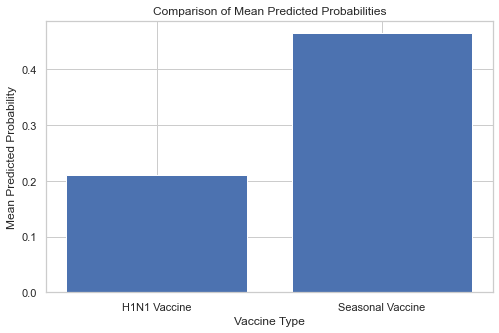

In [34]:
# Count of respondent_id
respondent_count = probs_df['respondent_id'].nunique()
print(f"Number of unique respondents: {respondent_count}")

# Calculate mean probabilities for each vaccine
mean_h1n1_prob = probs_df['h1n1_vaccine'].mean()
mean_seasonal_prob = probs_df['seasonal_vaccine'].mean()

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(['H1N1 Vaccine', 'Seasonal Vaccine'], [mean_h1n1_prob, mean_seasonal_prob])
plt.xlabel('Vaccine Type')
plt.ylabel('Mean Predicted Probability')
plt.title('Comparison of Mean Predicted Probabilities')
plt.show()

The bar graph shows the comparison of mean predicted probabilities for H1N1 and seasonal flu vaccines. 

**Key Observations:**

- Higher Probability for Seasonal Flu: The bar for the seasonal flu vaccine is significantly taller than the bar for the H1N1 vaccine. This indicates that the model, on average, predicts a higher probability of individuals receiving the seasonal flu vaccine compared to the H1N1 vaccine.

### Feature Importance

**SHAP(SHapley Additive exPlanations)** is applied after the model has been trained.

After spliting the data into training and testing datastes, SHAP is used to intepret the model predictions on the test set.

This helps evaluate how well the  model generalizes to unseen data(X_test_preprocessed) and provide feature importance based on predictions made on the testing set.


H1N1 SHAP Summary Plot


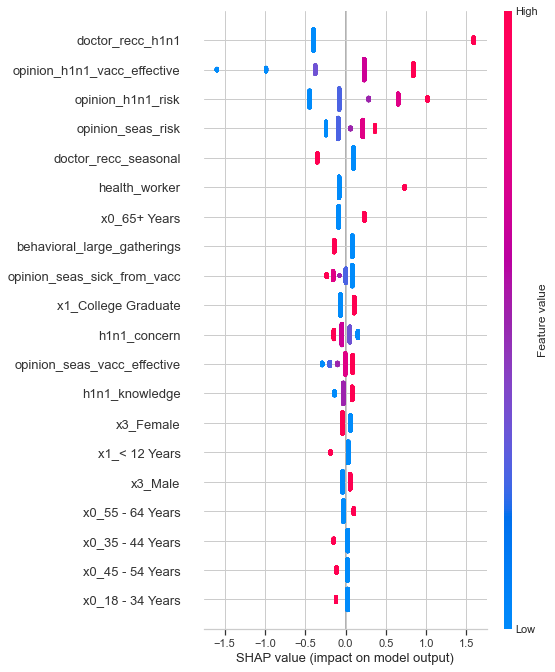

In [35]:
import shap

# SHAP Feature Importance for H1N1
explainer_h1n1 = shap.Explainer(model_h1n1, X_train_preprocessed)
shap_values_h1n1 = explainer_h1n1(X_test_preprocessed)

print("H1N1 SHAP Summary Plot")
shap.summary_plot(shap_values_h1n1, X_test_preprocessed, feature_names=list(numerical_features) + list(encoder.get_feature_names()))



**Insights**

- Features like ***doctor_recc_h1n1*** and ***opinion_h1n1_vacc_effective*** show strong and consistent impacts on the prediction. High values contribute positively, indicating that a doctor’s recommendation or a favorable opinion strongly influences the outcome.



**Top Features**

- ***doctor_recc_h1n1***: A doctor’s recommendation for the H1N1 vaccine has the strongest positive impact on predicting vaccination likelihood.

- ***opinion_h1n1_vacc_effective***: Favorable opinions about the vaccine's effectiveness also strongly influence the prediction positively.

- ***opinion_h1n1_risk*** and ***opinion_seas_risk***: Perception of risk contributes to the likelihood of vaccination.

- ***doctor_recc_seasonal***: A recommendation for the seasonal vaccine is also important, albeit slightly less than for H1N1.

**Recomendations**

To increase vaccination rates, we should:

1. Encourage doctors to actively recommend vaccines during patient visits.

2. Create public campaigns that emphasize vaccine effectiveness.

3. Raise awareness about the risks of H1N1 and Seasonal Flu, especially among vulnerable groups.


Seasonal SHAP Summary Plot


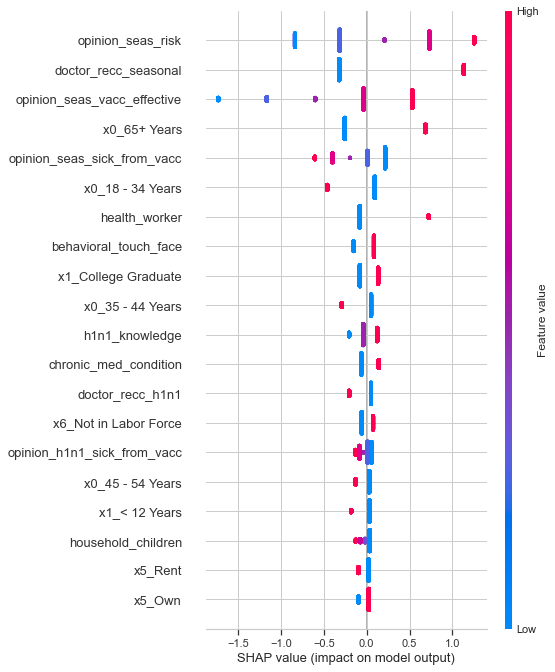

In [36]:
# SHAP Feature Importance for Seasonal
explainer_seasonal = shap.Explainer(model_seasonal, X_train_preprocessed)
shap_values_seasonal = explainer_seasonal(X_test_preprocessed)

print("Seasonal SHAP Summary Plot")
shap.summary_plot(shap_values_seasonal, X_test_preprocessed, feature_names=list(numerical_features) + list(encoder.get_feature_names()))

**Top Features**

***opinion_seas_risk***:
- High perceived risk (red) increases the likelihood of vaccination (positive SHAP values).
- Low perceived risk (blue) reduces the likelihood (negative SHAP values).

***doctor_recc_seasonal***:
- When a doctor recommends the seasonal vaccine (high value, red), it strongly increases the likelihood of vaccination.

***opinion_seas_sick_from_vacc***:
- High concern about getting sick from the vaccine (red) decreases the likelihood of vaccination.

**Recommendations**

To increase flu vaccination rates, we need to:

1. Highlight the risks of catching the flu, especially for vulnerable groups.

2. Empower doctors to emphasize the importance of getting vaccinated.

3. Dispel myths and educate people about the safety of the flu vaccine


### Conclusion

Key Drivers of Vaccination Uptake:
1. A doctor's recommendation is the strongest and most consistent factor influencing both H1N1 and Seasonal flu vaccination uptake. Public health organizations should work closely with healthcare providers to encourage vaccine recommendations during patient visits.

2. Perceptions of vaccine effectiveness strongly influence decision-making. People who believe vaccines are effective are more likely to get vaccinated.

3. Risk Perception plays a significant role. Individuals who perceive a high risk of contracting H1N1 or the Seasonal Flu are more inclined to get vaccinated, indicating the need for risk awareness campaigns.
